In [44]:
import dowhy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import logging
logging.getLogger("dowhy").setLevel(logging.INFO)

In [125]:
dataset = pd.read_csv('/Users/didi/Downloads/mask_evaluation.csv',encoding='GBK')
pd.set_option('display.max_columns',None)
dataset.head()

,passenger_id,p_gender,age_level,city_id_resident1,resident_city_level,passenger_with_car_probablity,is_businessman,net_first_level_stage,platform_first_level_stage,member_level,core_flag,probability_new,gulf_finish_num,wyc_finish_num,gulf_finish_ratio,accum_gulf,accum_fin,first_gulf_to_today,first_fin_to_today,bubble_num,gulf_call_num,single_gulf_call_num,single_gulf_call_ratio,gulf_answer_dur,gulf_arrive_dur,gulf_answer_ratio,cancel_ratio,gulf_subsidy_c,gulf_subsidy_c_ratio,driver_service_score,chaping_num,cpo_gulf_order_num,liucun_flag,dt,week,mask_order_num,mask_order_ratio,is_treatment
0,11640020,1.0,4.0,17,二线城市,1.0,1.000000,成熟期,成熟期,3,0,0.988500,1,5,0.200000,78,791,2344,2879,170.0,1.0,1.0,1.000000,4.0,25.0,1.0,0.0,0.000000,0.000000,92.400002,0,0.0,0,2022-01-30,3,0,0.000000,0
1,1691873389451,-1.0,5.0,17,二线城市,NaN,0.825371,成熟期,成熟期,3,0,0.998327,2,3,0.666667,169,431,921,2242,433.0,5.0,4.0,0.800000,3.0,204.0,0.8,0.4,15.000000,0.102701,100.000000,0,0.0,0,2022-02-06,4,0,0.000000,0
2,35184504335954,-1.0,3.0,17,二线城市,NaN,0.999286,成熟期,成熟期,5,1,0.999726,4,4,1.000000,583,697,518,518,115.0,4.0,4.0,1.000000,2.0,133.0,1.0,0.0,0.000000,0.000000,104.799999,0,0.0,1,2022-01-30,3,2,0.500000,1
3,871694336006,-1.0,4.0,17,二线城市,1.0,0.800440,成熟期,成熟期,5,1,0.999321,7,8,0.875000,64,219,2032,2137,192.0,7.0,6.0,0.857143,2.0,152.0,1.0,0.0,1.247143,0.017150,102.985713,0,0.0,1,2022-03-06,8,2,0.285714,1
4,671159549954,1.0,4.0,17,二线城市,1.0,0.764177,成熟期,成熟期,2,0,0.775890,1,1,1.000000,25,111,2369,2401,23.0,1.0,1.0,1.000000,4.0,89.0,1.0,0.0,0.000000,0.000000,104.199997,0,0.0,0,2022-01-16,1,0,0.000000,0


In [79]:
dataset.columns

Index(['passenger_id', 'p_gender', 'age_level', 'city_id_resident1',
       'resident_city_level', 'passenger_with_car_probablity',
       'is_businessman', 'net_first_level_stage', 'platform_first_level_stage',
       'member_level', 'core_flag', 'probability_new', 'gulf_finish_num',
       'wyc_finish_num', 'gulf_finish_ratio', 'accum_gulf', 'accum_fin',
       'first_gulf_to_today', 'first_fin_to_today', 'bubble_num',
       'gulf_call_num', 'single_gulf_call_num', 'single_gulf_call_ratio',
       'gulf_answer_dur', 'gulf_arrive_dur', 'gulf_answer_ratio',
       'cancel_ratio', 'gulf_subsidy_c', 'gulf_subsidy_c_ratio',
       'driver_service_score', 'chaping_num', 'cpo_gulf_order_num',
       'liucun_flag', 'dt', 'week', 'mask_order_num', 'mask_order_ratio',
       'is_treatment'],
      dtype='object')

In [144]:
df=dataset.drop(['passenger_id','dt','week','mask_order_num','mask_order_ratio'],axis=1)
df=df.sample(20000)
df=df.fillna(0)

In [145]:
df.groupby('is_treatment').liucun_flag.sum()/df.groupby('is_treatment').size()

is_treatment
0    0.284060
1    0.433521
dtype: float64

In [146]:
import pygraphviz
causal_graph = """digraph {
liucun_flag;
is_treatment;
gulf_finish_num;
wyc_finish_num;
probability_new;
gulf_finish_ratio;


wyc_finish_num->probability_new;
gulf_finish_num->probability_new;
gulf_finish_ratio->probability_new;

gulf_finish_num->is_treatment;

gulf_finish_num->liucun_flag;
probability_new->liucun_flag;
gulf_finish_ratio->liucun_flag;
is_treatment->liucun_flag
}"""

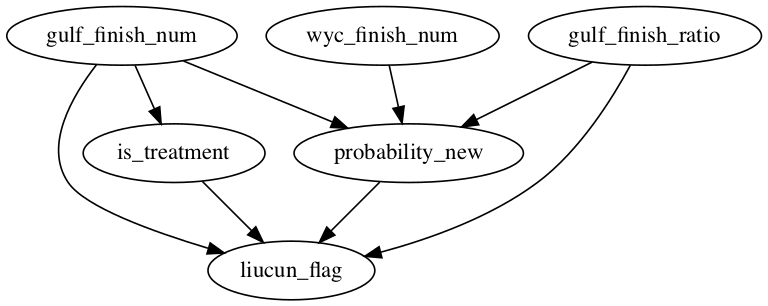

In [147]:
#df=df[['liucun_flag','is_treatment','gulf_finish_num','wyc_finish_num']]
model= dowhy.CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='is_treatment',
        outcome='liucun_flag')
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [148]:
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
      d                                                 
──────────────(Expectation(liucun_flag|gulf_finish_num))
d[isₜᵣₑₐₜₘₑₙₜ]                                          
Estimand assumption 1, Unconfoundedness: If U→{is_treatment} and U→liucun_flag then P(liucun_flag|is_treatment,gulf_finish_num,U) = P(liucun_flag|is_treatment,gulf_finish_num)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [156]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching",target_units="ate"
                                 #method_name="backdoor.linear_regression",target_units="ate"
                                 #method_name="backdoor.propensity_score_weighting",target_units='ate'
                                 #method_name="backdoor.propensity_score_stratification",target_units="ate"
                                )
# ATE = Average Treatment Effect
# ATT = Average Treatment Effect on Treated (i.e. those who were assigned a different room)
# ATC = Average Treatment Effect on Control (i.e. those who were not assigned a different room)
print(estimate)

propensity_score_matching


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()


NotImplementedError: This method for testing statistical significance is not yet implemented for <class 'dowhy.causal_estimators.propensity_score_matching_estimator.PropensityScoreMatchingEstimator'>. If you would this to be implemented in the next version, please raise an issue at https://github.com/microsoft/dowhy/issues Meanwhile, you can try the bootstrap method (method='bootstrap') to test statistical significance.

In [34]:
estimate.propensity_scores

730291    0.393282
807751    0.475732
269718    0.316496
689282    0.393282
91258     0.316496
            ...   
76421     0.316496
804753    0.316496
187401    0.963269
579402    0.316496
979183    0.316496
Name: propensity_score, Length: 20000, dtype: float64

In [42]:
df['ps']=estimate.propensity_scores

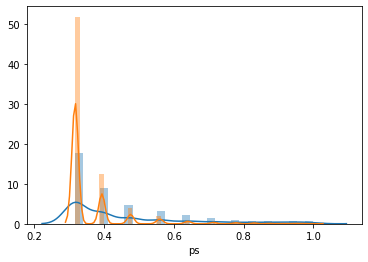

In [49]:
sns.distplot(df[df.is_treatment==1].ps,label='1')
sns.distplot(df[df.is_treatment==0].ps,label='0')

In [15]:
help(model.estimate_effect)

Help on method estimate_effect in module dowhy.causal_model:

estimate_effect(identified_estimand, method_name=None, control_value=0, treatment_value=1, test_significance=None, evaluate_effect_strength=False, confidence_intervals=False, target_units='ate', effect_modifiers=None, fit_estimator=True, method_params=None) method of dowhy.causal_model.CausalModel instance
    Estimate the identified causal effect.
    
    Currently requires an explicit method name to be specified. Method names follow the convention of identification method followed by the specific estimation method: "[backdoor/iv].estimation_method_name". Following methods are supported.
        * Propensity Score Matching: "backdoor.propensity_score_matching"
        * Propensity Score Stratification: "backdoor.propensity_score_stratification"
        * Propensity Score-based Inverse Weighting: "backdoor.propensity_score_weighting"
        * Linear Regression: "backdoor.linear_regression"
        * Generalized Linear Mode

In [97]:
refute_results=model.refute_estimate(identified_estimand, estimate,
        method_name="random_common_cause")
print(refute1_results)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.

/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.

/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.

/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.

/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.

/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.

/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.

/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.

/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.

Refute: Add a random common cause
Estimated effect:-0.1504
New effect:0.0159615
p value:0.0



# pymatch

In [118]:
import pymatch
from pymatch.Matcher import Matcher

In [119]:
df1=dataset[['is_treatment',
'gulf_finish_num',
'wyc_finish_num']].fillna(0)
#df1=df1[df1.wyc_finish_num<=40]
test=df1[df1.is_treatment==1].sample(100000)
control=df1[df1.is_treatment==0].sample(1000)
m = Matcher(test, control,yvar="is_treatment", exclude=[])

Formula:
is_treatment ~ gulf_finish_num+wyc_finish_num
n majority: 100000
n minority: 1000


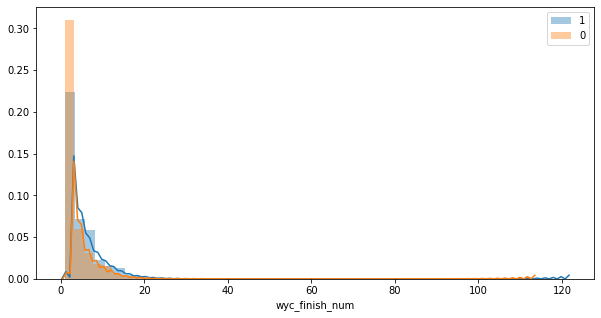

In [120]:
sns.distplot(df1[df1.is_treatment==1].wyc_finish_num,label='1')
sns.distplot(df1[df1.is_treatment==0].wyc_finish_num,label='0')
plt.legend()

In [121]:
np.random.seed(20201209)
m.fit_scores()

Fitting Models on Balanced Samples: 1\100Error: Unable to coerce to Series, length must be 1: given 2000
Fitting Models on Balanced Samples: 1\100Error: Unable to coerce to Series, length must be 1: given 2000
Fitting Models on Balanced Samples: 1\100Error: Unable to coerce to Series, length must be 1: given 2000
Fitting Models on Balanced Samples: 1\100Error: Unable to coerce to Series, length must be 1: given 2000
Fitting Models on Balanced Samples: 1\100Error: Unable to coerce to Series, length must be 1: given 2000

Average Accuracy: nan%


/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


# 原示例

In [52]:
import dowhy.datasets
data = dowhy.datasets.linear_dataset(
    beta=10,
    num_common_causes=5,
    num_instruments=2,
    num_samples=10000,
    treatment_is_binary=True)

In [67]:
model = dowhy.CausalModel(
    data=data["df"],
    treatment=data["treatment_name"],
    outcome=data["outcome_name"],
    graph=data["gml_graph"])

identified_estimand = model.identify_effect()
print(identified_estimand)

# III. Estimate the target estimand using a statistical method.
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_matching")
print(estimate)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W0,W2,W4,W3,W1))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W2,W4,W3,W1,U) = P(y|v0,W0,W2,W4,W3,W1)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

propensity_score_matching


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W0,W2,W4,W3,W1))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W2,W4,W3,W1,U) = P(y|v0,W0,W2,W4,W3,W1)

## Realized estimand
b: y~v0+W0+W2+W4+W3+W1
Target units: ate

## Estimate
Mean value: 13.062805187862525



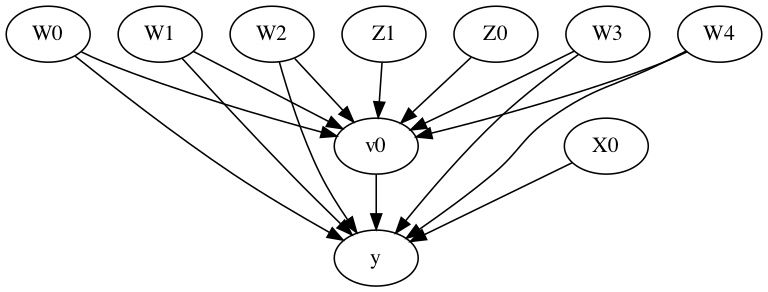

In [77]:
causal_graph = """digraph { 
         v0->y;W0-> v0; W1-> v0; W2-> v0;
         W3-> v0; W4-> v0;Z0-> v0; Z1-> v0;W0-> y; W1-> y; W2-> y; W3-> y; W4-> y;X0-> y;}"""

model_test=dowhy.CausalModel(
        data = data["df"],
        graph=causal_graph.replace("\n", " "),
        treatment=data["treatment_name"],
        outcome=data["outcome_name"]
        #graph=data["gml_graph"]
        )
# INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0'] on outcome ['y']
model_test.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [78]:
identified_estimand = model_test.identify_effect()
print(identified_estimand)

estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_matching")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W0,W2,W4,W3,W1))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W2,W4,W3,W1,U) = P(y|v0,W0,W2,W4,W3,W1)

### Estimand : 2
Estimand name: iv
Estimand expression:
Expectation(Derivative(y, [Z1, Z0])*Derivative([v0], [Z1, Z0])**(-1))
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!

propensity_score_matching


/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:83: FutureWarning: `item` has been deprecated and will be removed in a future version
  control_outcome = control.iloc[indices[i]][self._outcome_name].item()
/opt/anaconda3/lib/python3.7/site-packages/dowhy/causal_estimators/propensity_score_matching_estimator.py:98: FutureWarning: `item` has been deprecated and will be removed in a future version
  treated_outcome = treated.iloc[indices[i]][self._outcome_name].item()


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                                 
─────(Expectation(y|W0,W2,W4,W3,W1))
d[v₀]                               
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W0,W2,W4,W3,W1,U) = P(y|v0,W0,W2,W4,W3,W1)

## Realized estimand
b: y~v0+W0+W2+W4+W3+W1
Target units: ate

## Estimate
Mean value: 13.062805187862525

Causal Estimate is 13.062805187862525


In [124]:
print(pd.__version__)

0.25.1


In [1]:
!pip install psmatching

In [2]:
import psmatching